# Unemployment Analysis - India

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.express as px
unemployment = pd.read_csv('../dataset/unemployment_india.csv')

In [2]:
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
unemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [4]:
unemployment.shape

(768, 7)

In [5]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## Data Cleaning

In [6]:
# Checking for null values
unemployment.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
print("Null values in the dataset:")
print(unemployment.isnull().sum())

# Droping rows with null values
unemployment = unemployment.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
unemployment.head()

Null values in the dataset:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64
Cleaned DataFrame:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
# Changing column names so that they dont have white-spaces, numbers or any special-characters
unemployment.columns =['State','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [9]:
# Converting the 'Date' column to datetime format
unemployment['Date'] = pd.to_datetime(unemployment['Date'], dayfirst=True)
unemployment['Date'].head()

0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]

In [10]:
# Converting the 'Frequency' column to categorical data type
unemployment['Frequency']= unemployment['Frequency'].astype('category')
unemployment['Frequency'].head()

0     Monthly
1     Monthly
2     Monthly
3     Monthly
4     Monthly
Name: Frequency, dtype: category
Categories (2, object): [' Monthly', 'Monthly']

In [11]:
# Converting the 'Area' column to categorical data type
unemployment['Area'] = unemployment['Area'].astype('category')

In [12]:
# Extracting the 'Month' from the Date
unemployment['Month'] = unemployment['Date'].dt.month
unemployment.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9


In [13]:
# Creating a new column 'MonthNumber' by converting the 'Month' column values to integers
unemployment['MonthNumber'] = unemployment['Month'].apply(lambda x : int(x))

In [14]:
#creating a new column 'MonthName' by converting the 'MonthNumber' column values to the monthNames
unemployment['MonthName'] =  unemployment['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [15]:
# Dropping the Month column as it in irrelevant now
# We have extracted the monthNumbers and monthNames individually
unemployment.drop(columns='Month',inplace=True)
unemployment.head(3)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


## Statistics

In [16]:
unemployment.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber
count,740,740.000000,7.400000e+02,740.000000,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122,6.390541
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,1.000000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500,4.000000
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000,6.000000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000,9.000000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000,12.000000
std,NaN,10.721298,8.087988e+06,8.111094,3.235070


In [17]:
# Number summary of the numerical variables which give some information
round(unemployment[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

# Rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [18]:
# Grouping by 'Region' and finding mean values for the numerical columns
regionStats = unemployment.groupby(['Area'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

# Rounding the values to 2 decimal points
round(regionStats,2)

C:\Users\thema\AppData\Local\Temp\ipykernel_2976\762572215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regionStats = unemployment.groupby(['Area'])[['Estimated Unemployment Rate',


,Area,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


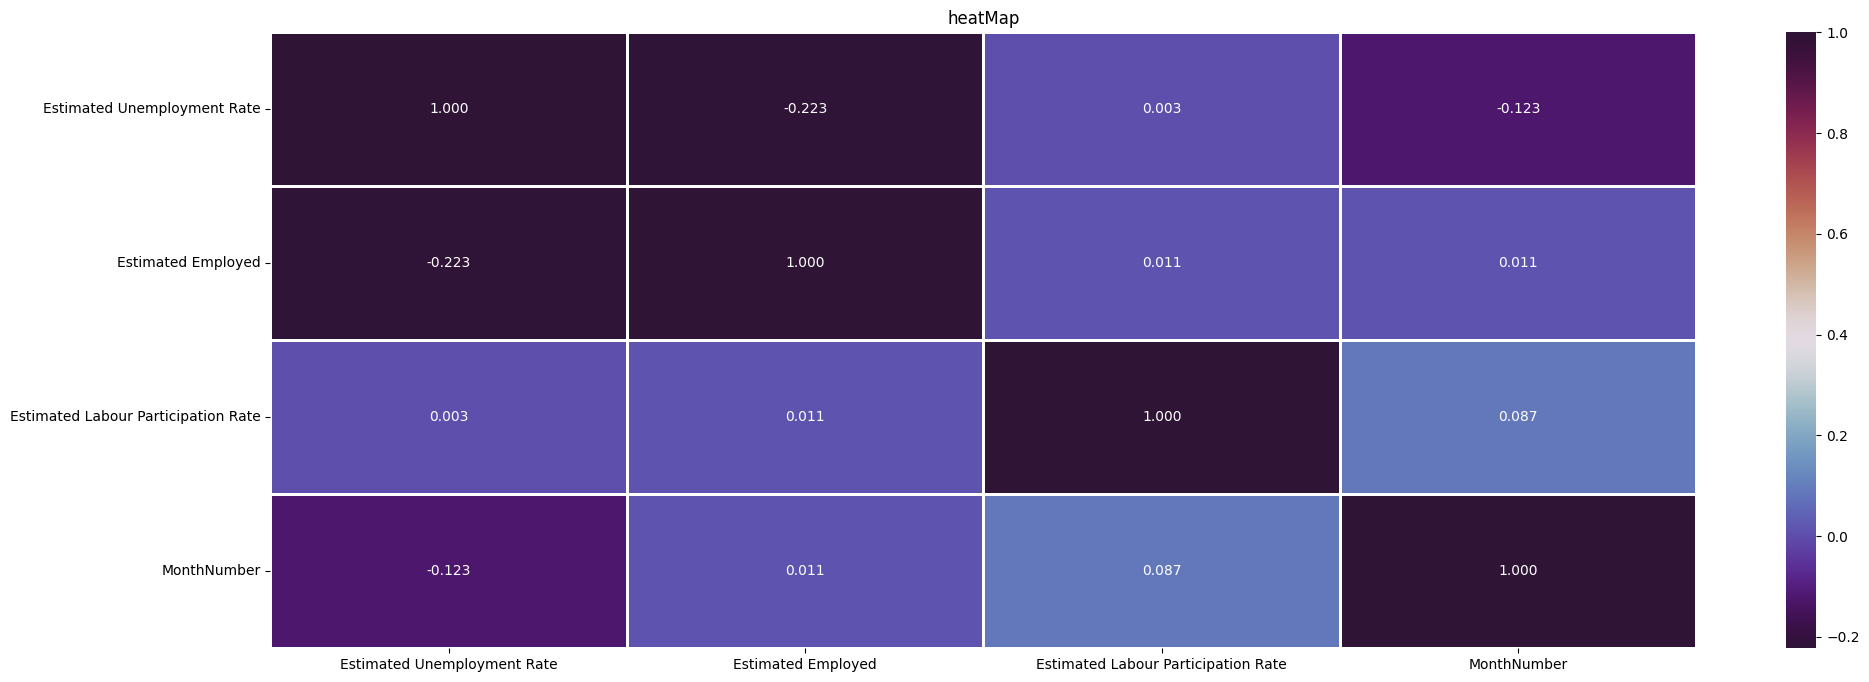

In [19]:
# Constructing a 'heatMap' to find the 'pair-wise correlation' values

# Dataframe of all the numerical columns
heatMap = unemployment[['Estimated Unemployment Rate', 'Estimated Employed', 
              'Estimated Labour Participation Rate', 'MonthNumber']]

# Constructing on heatMap with correlation values
heatMap = heatMap.corr()

# Plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

## EDA - Exploratory Data Analysis

In [20]:
# Plotting a box-plot to show un-employment rate in each state
fig = px.box(
    unemployment,
    x='State',
    y='Estimated Unemployment Rate',
    color='State',
    title='Unemployment Rate',
    template='plotly'
)
fig.show()

In [21]:
# Creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(
    unemployment,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Area')

# Increase figure size and rotate axis labels
fig.update_layout(
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    yaxis=dict(tickangle=0)    # Keep y-axis labels horizontal
)

fig.show()

In [22]:
# Plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = unemployment[['Estimated Unemployment Rate','State']]

# Grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('State').mean().reset_index()

# Sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF, 
             x='State',
             y='Estimated Unemployment Rate',
             color='State',
             title='State Wise Average Employment Rate')
fig.show()

In [23]:
# Plotting a "Bar-plot" to find the "unemployment rate" for each "Area" month-wise
fig = px.bar(unemployment, 
             x='Area',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='Area',
             title='Area Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

In [24]:
# Creating a new dataframe with 'State-wise' & 'Area-wisee' Estimated Unemployment Rate
unempDF = unemployment[['State','Area','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

unempDF = unempDF.groupby(['Area','State'])['Estimated Unemployment Rate'].mean().reset_index()

# Printing the new dataframe
unempDF.head(4)

C:\Users\thema\AppData\Local\Temp\ipykernel_2976\1931814669.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Area,State,Estimated Unemployment Rate
0,Rural,Andhra Pradesh,5.526429
1,Rural,Assam,4.490833
2,Rural,Bihar,16.770000
3,Rural,Chandigarh,NaN


In [25]:
# A sunburst chart (hierarchical chart) for unemployment rate region-wise and state-wise
fig = px.sunburst(unempDF, 
                  path=['Area','State'], 
                  values='Estimated Unemployment Rate',
                  title= 'Unemployment Rate in each Area and State',
                  height=650)
fig.show()

## Impact of Lockdown on States Estimated Employed

In [26]:
# Define state coordinates
state_coords = {
    "Andhra Pradesh": [15.9129, 79.7400],
    "Arunachal Pradesh": [28.2180, 94.7278],
    "Assam": [26.2006, 92.9376],
    "Bihar": [25.0961, 85.3131],
    "Chhattisgarh": [21.2787, 81.8661],
    "Goa": [15.2993, 74.1240],
    "Gujarat": [22.2587, 71.1924],
    "Haryana": [29.0588, 76.0856],
    "Himachal Pradesh": [31.1048, 77.1734],
    "Jharkhand": [23.6102, 85.2799],
    "Karnataka": [15.3173, 75.7139],
    "Kerala": [10.8505, 76.2711],
    "Madhya Pradesh": [22.9734, 78.6569],
    "Maharashtra": [19.7515, 75.7139],
    "Manipur": [24.6637, 93.9063],
    "Meghalaya": [25.4670, 91.3662],
    "Mizoram": [23.1645, 92.9376],
    "Nagaland": [26.1584, 94.5624],
    "Odisha": [20.9517, 85.0985],
    "Punjab": [31.1471, 75.3412],
    "Rajasthan": [27.0238, 74.2179],
    "Sikkim": [27.5330, 88.5122],
    "Tamil Nadu": [11.1271, 78.6569],
    "Telangana": [18.1124, 79.0193],
    "Tripura": [23.9408, 91.9882],
    "Uttar Pradesh": [26.8467, 80.9462],
    "Uttarakhand": [30.0668, 79.0193],
    "West Bengal": [22.9868, 87.8550],
    "Delhi": [28.7041, 77.1025],
    "Jammu and Kashmir": [33.7782, 76.5762],
    "Ladakh": [34.1526, 77.5771],
}

# Converting to DataFrame
coords_df = pd.DataFrame.from_dict(state_coords, orient='index', columns=['latitude', 'longitude']).reset_index()
coords_df.rename(columns={'index': 'State'}, inplace=True)

# Merging with unemployment data
unemployment = unemployment.merge(coords_df, on="State", how="left")

# Creating a scatter geospatial plot
fig = px.scatter_geo(unemployment, 
                     lat='latitude', lon='longitude',
                     color="Area",
                     hover_name="State", 
                     size="Estimated Unemployment Rate",
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

# Frame duration (in milliseconds)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

# Updating geospatial view
fig.update_geos(lataxis_range=[5, 35], 
                lonaxis_range=[65, 100],
                oceancolor="#6dd5ed",
                showocean=True)

fig.show()


In [27]:
# Filtering dataset between month 4 and 7 (inclusive) - after lockdown
df47 = unemployment[(unemployment['MonthNumber'] >= 4) & (unemployment['MonthNumber'] <=7)]

# Filtering dataset between month 1 and 4 (inclusive) - before lockdown
df14 = unemployment[(unemployment['MonthNumber'] >= 1) & (unemployment['MonthNumber'] <=4)]

In [28]:
# Grouping the dataframe on the basis of "States" and finding the corresponding mean values
df47g = df47.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()

# Grouping the dataframe on the basis of "States" and finding the corresponding mean values
df14g = df14.groupby('State')['Estimated Unemployment Rate'].mean().reset_index()

# Clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

# Renaming the column values for better understanding
df47g.columns = ['State','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

# Risplaying the top results
df47g.head()

,State,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [29]:
# Computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)
df47g

,State,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown,% change in unemployment
0,Andhra Pradesh,10.054167,10.756250,9.05
1,Assam,6.049091,6.750000,5.05
2,Bihar,25.370000,23.690000,24.37
3,Chandigarh,14.942500,19.366667,13.94
4,Chhattisgarh,11.659167,9.028750,10.66
5,Delhi,18.141667,16.758750,17.14
6,Goa,10.596667,7.577143,9.60
7,Gujarat,8.155833,9.346250,7.16
8,Haryana,29.211667,29.186250,28.21
9,Himachal Pradesh,15.993333,15.816250,14.99


In [30]:
# Plotting a 'bar-chart' for the "%change in unemployment A/ lockdown"
fig = px.bar(df47g, x='State',y='% change in unemployment',
             color='% change in unemployment',
             title='% Change in Unemployment A/ Lockdown')

fig.show()

In [31]:
# Defining a function to sort the values based on impact
# From the above 'box-plot', the values are ranging between 0 and 40

def sort_impact(x):
    if x <= 10:
        #impactedState
        return '🥲'
    
    elif x <= 20:
        #hardImpactedState
        return '🥲😥'
    
    elif x <= 30:
        #harderImpactedState
        return '🥲😥😖'
    
    elif x <= 40:
        #hardestImpactedState
        return '🥲😥😖🤯'
    
    return x    


In [32]:
# Adding a new column to the 'dataframe', classifying the "%change in employment" on the basis of impactStatus
df47g['impactStatus'] = df47g['% change in unemployment'].apply(lambda x:sort_impact(x))

In [33]:
# Plotting a "bar-graph" to classify and denote the impack of lockdown on employment for different states
fig = px.bar(df47g, 
             y='State',
             x='% change in unemployment',
             color='impactStatus',
             title='Lockdown Impact on Employment in India')

fig.show()